# What factors made people more likely to survive in Titanic event?

### Background: 
Titanic sank on Apr. 15, 1912 which killed 1502 out of 2224 passengers and crew. This tragedy ask us to think of the safety regulations for ships.  Not enough lifeboats is the main reason. However, under this situation, there are still some groups of people were more likely to survive than others. In this analysis, I would like to investigate what are the factors cause the higher survival rate.  The main focus will be on gender, class level and age.

## 1.Read data：
There are 891 rows and 12 columns in the data set. It includes passenger Id, which class the passenger in, passengers' name, gender, age, ticket number fare, cabin, embarked, parch, sibsp and if the passenger survived.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic-data.csv',index_col = 'PassengerId')

In [2]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Data Wrangling:
Check if data had missing values. Since we focus more on how gender, Pclass and Age related to survival rate. Thus, we check the missing data for those columns. From below code, we've seen tht there are 177 users whose ages are unclear. Thus, in analysis, we can ignore those users and look at the rest peoples' ages distribution and relationship for survival rate.

In [3]:
data['Survived'].isnull().sum() 

0

In [4]:
data['Age'].isnull().sum()

177

In [5]:
data['Sex'].isnull().sum()

0

In [6]:
data['Pclass'].isnull().sum()

0

## 3. Analysis

### A. which Pclass had the highest survival rate?

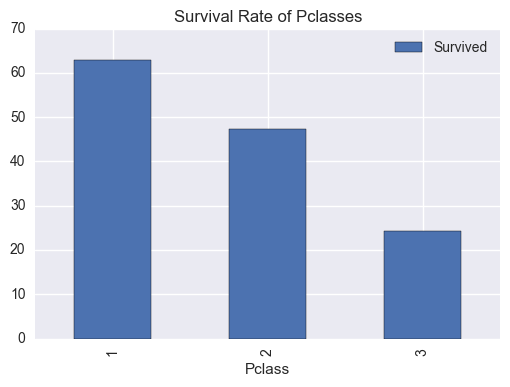

In [75]:
import seaborn as sns
%matplotlib inline
def survival_rate(dat):
    return sum(dat)/float(len(dat))*100 ##calculate the survival rate on percentage base
class_result = data.groupby('Pclass')['Survived'].apply(survival_rate).to_frame()
class_result.plot(kind = 'bar',title = "Survival Rate of Pclasses")

### Code result explanation: 
The result is the percentage of survival rate corresponding to Pclass level. So Class 1 had 62.96% survival rate, Class 2 had 47.28% survival rate and Class 3 had 24.24% of survival rate. From the plot above, it is very clear that better class shows higher survival rate.

### B. If male or female easy to survive?

(-1.0011332887074036, 1.0, -1.0016505596330263, 1.0005830961321471)

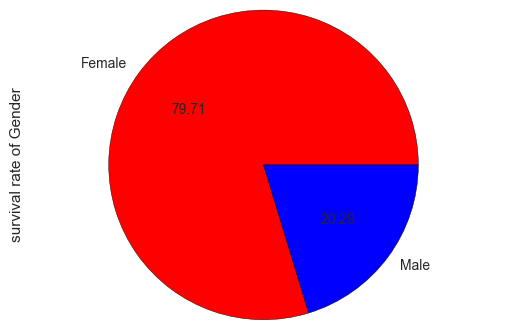

In [72]:
gender_result = data.groupby('Sex',as_index=False)['Survived'].apply(survival_rate)
gender_result.plot(kind = 'pie',colors=['r','b'],autopct='%.2f',label = 'survival rate of Gender',labels = ["Female","Male"])
import matplotlib.pyplot as plt
plt.axis('equal')

### Code result explanation: 
The result is the percentage of survival rate corresponding to Gender. So Female survival rate is 79.71% versus male survival rate is 20.29%. From the pie plot, female had more chance to survive.

### C.  How's age related to survival rate?

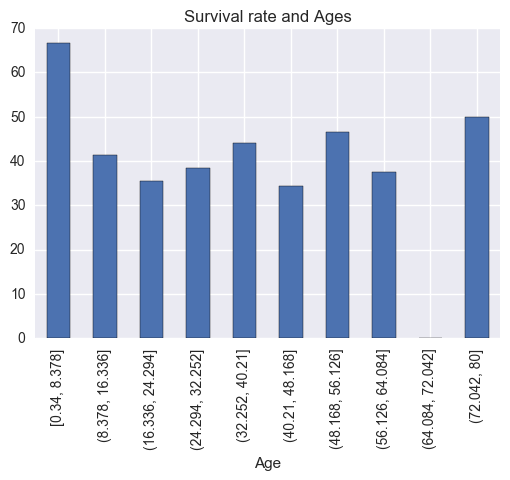

In [76]:
age_result = data.groupby(pd.cut(data["Age"], 10,include_lowest=True))['Survived'].apply(survival_rate)
age_result.plot(kind = 'bar',title = "Survival rate and Ages")

### Code result explanation: 
The result is the percentage of survival rate corresponding to Age bins.From above bar plot, We've seen children (under 9) had the highest survival rate. There is another peak, which is age above 72. The interesting thing is, 64-72 had a extreamly low survival rate. We'd like to investigate why.

In [51]:
data[(data["Age"] <= 72) & (data["Age"] > 64)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


It seems only 9 people belong to the age bin of 64 to 72 and None of them survived. It is hardly to conclude this age bin had 0 survival rate, since the sample amount is too small.

### C. It is worth to check if conjunct variables will affect the survival rate, e.g. Gender and Pclass.

In [16]:
import scipy.stats as stats
tab = pd.crosstab(data['Sex'],data['Pclass'],margins = True)
tab

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [17]:
##Chi-squared independent test
observed = tab.ix[0:2,0:3] 
stats,p_value,degree,expected = stats.chi2_contingency(observed = observed)

In [44]:
print "test stats = %.2f" %stats
print "degree = %.0f" %degree

test stats = 16.97
degree = 2


In [66]:
print "p_value = {:.3%}".format(p_value)

p_value = 0.021%


### Code result explanation:
Above codes are calculate the contingency table of 'Sex' and 'Pclass' and chi-squared independence test. The result shows the test statistic, p-value, degree of freedom and the expected frequencies, based on the marginal sums of the table, individually. We see a very small p-value (0.02%), which reject the null hypotheses, if we choose 0.05% significant level. This indicates that gender and Pclass are not independent. Thus, we can further looking at how gender and Pclass pare affect the survival rate. 

In [78]:
gender_result = data.groupby(['Sex','Pclass'],as_index=False)['Survived'].apply(survival_rate)
gender_result.to_frame(name = 'Survival Rate')

Survival Rate
Sex    Pclass               
female 1           96.808511
       2           92.105263
       3           50.000000
male   1           36.885246
       2           15.740741
       3           13.544669

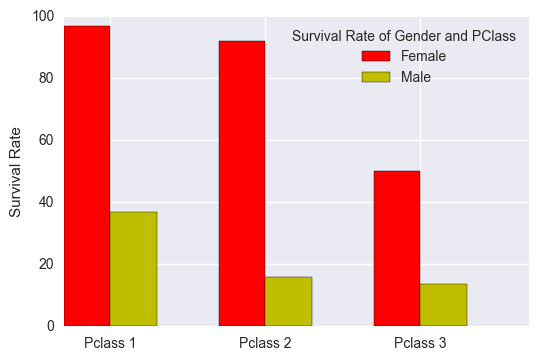

In [80]:
import matplotlib.pyplot as plt
Pclass = list(set(data['Pclass']))
Sex = list(set(data['Sex']))
fig, ax = plt.subplots()
ind = np.arange(3)
width = 0.3
rects1 = ax.bar(ind,gender_result[0:3],width,color='r')
rects2 = ax.bar(ind + width,gender_result[3:6],width,color='y')
ax.set_ylabel('Survival Rate')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Pclass 1', 'Pclass 2', 'Pclass 3'))
ax.legend((rects1[0], rects2[0]), ('Female', 'Male'),title = 'Survival Rate of Gender and PClass')


### Code result explanation:
Above codes are calculate the percentage of survival rate of (gender, Pclass) pair. It seems that female who come from Pclass 1 had 96.8% of survival rate!

# Conlcusion

## Many factors are related to survival rate, such as gender, Pclass and Age. And some of the features are not independent. These analysis can be helpful if we would like to predict survive based on passengers' information.